# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [23]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline



# Import passengers.csv and set it as a time-series object. Plot the TS
data=pd.read_csv('passengers.csv')

data.head()
data.Month=pd.to_datetime(data.Month)
data.set_index('Month', inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


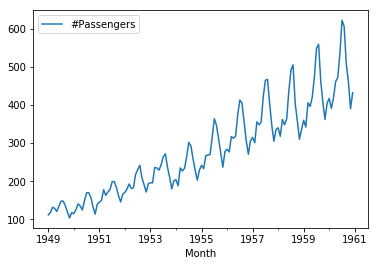

In [24]:
data.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [75]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts, dfcol):
    rolmean =ts.rolling(window = 8, center = False).mean()
    rolstd = ts.rolling(window = 8, center = False).std()
    import matplotlib.pyplot as plt

    #Plot rolling statistics
    fig = plt.figure(figsize=(12,7))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    from statsmodels.tsa.stattools import adfuller


    dftest = adfuller(dfcol)

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dftest)
    if dftest[1]>0.05:
        print('not stationary')
    else:
        print('stationary')
    

Use your newly created function on the airpassenger data set.

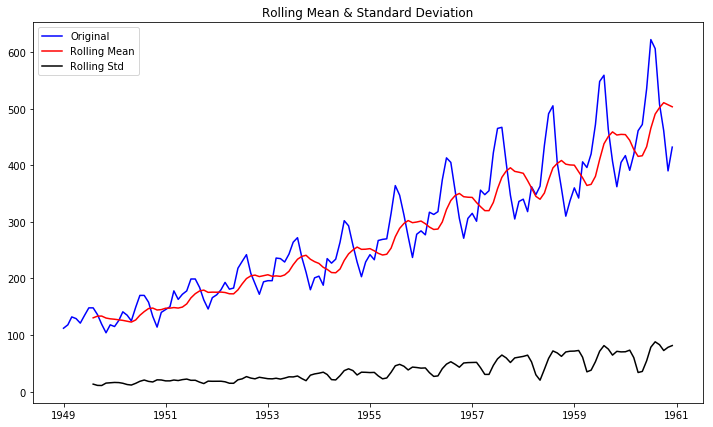

(0.8153688792060456, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
not stationary


In [76]:
# Code here

stationarity_check(data, data['#Passengers'])

## Perform a log() and sqrt() transform

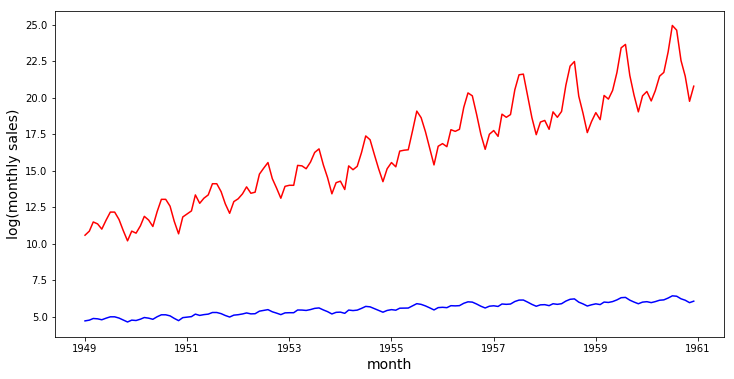

In [77]:
# Log transform timeseries and compare with original to check the effect

log_data = np.log(data)
sq_data = np.sqrt(data)
fig = plt.figure(figsize=(12,6))
plt.plot(log_data, color="blue")
plt.plot(sq_data, color = "red")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.show()


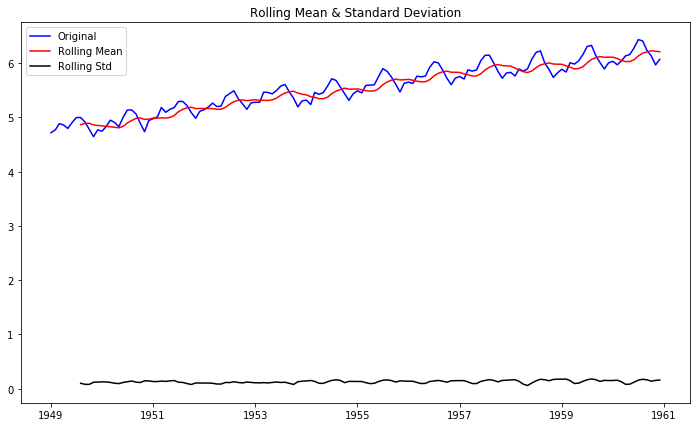

(-1.717017089106962, 0.42236677477039053, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)
not stationary


In [78]:
stationarity_check(log_data, log_data['#Passengers'])

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

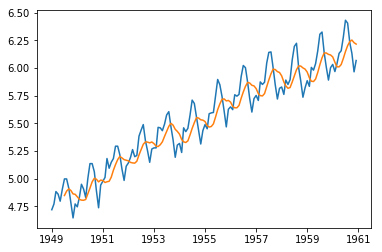

In [79]:
# your code here
rolmeanlog =log_data.rolling(window = 7, center = False).mean()

plt.plot(log_data)
plt.plot(rolmeanlog)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [80]:
# Subtract the moving average from the original data and check head for Nans
subt=log_data-rolmeanlog
subt.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [81]:
# Drop the NaN values from timeseries calculated above
subt=subt.dropna()

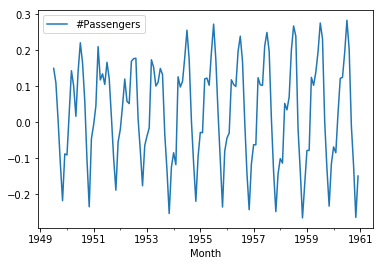

In [82]:
# Plot the result
subt.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

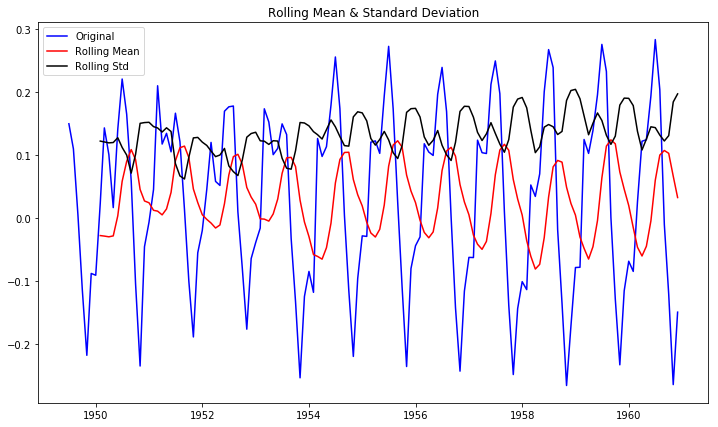

(-2.3480270028588213, 0.15694559814096343, 14, 123, {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}, -461.2243717875772)
not stationary


In [83]:
# Your code here
stationarity_check(subt, subt['#Passengers'])

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [84]:
# Your conclusion here
# time series data is Still not stationary 

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

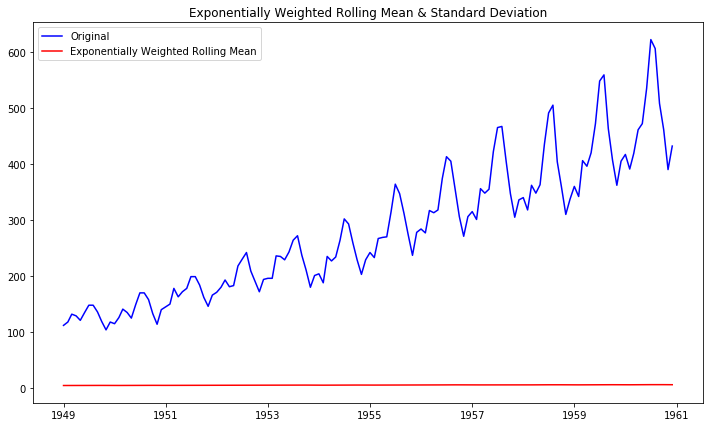

In [85]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log]

exp_rolmean = log_data.ewm(halflife = 2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# Plot the original data with exp weighted average


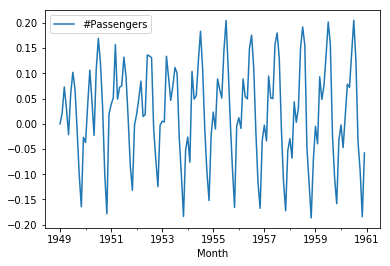

In [86]:
# Subtract the moving average from the original data and plot
subt2=log_data-exp_rolmean
subt2=subt2.dropna()
subt2.plot()

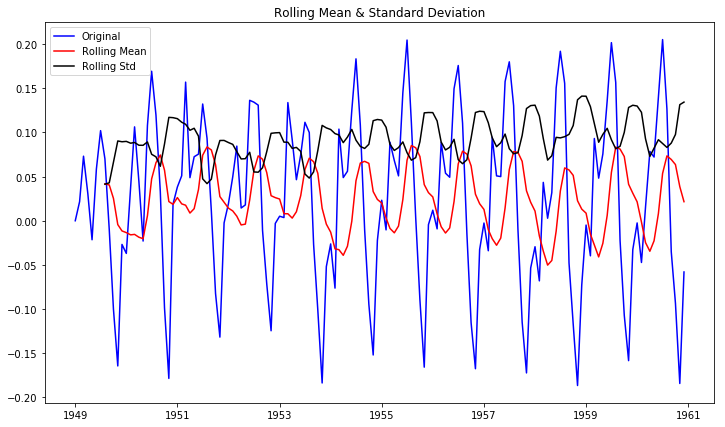

(-3.0876955301172058, 0.027477276656018644, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -531.3219428582033)
stationary


In [87]:
# do a stationarity check
stationarity_check(subt2, subt2['#Passengers'])


### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


# Your conclusion here

After applying weighter rolling mean and subtracting from the log, the data became stationary. it look more linear in the plot, also, the dickey test shows that p value is lower than o.o5 so we reject the null . and calim that the data is stationry.



## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [88]:
# difference your data and look at the head
subt2_diff = subt2.diff(periods=1)
subt2_diff.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,0.021616
1949-03-01,0.051525
1949-04-01,-0.042575
1949-05-01,-0.052119
1949-06-01,0.080050
1949-07-01,0.043604
1949-08-01,-0.031899
1949-09-01,-0.080159


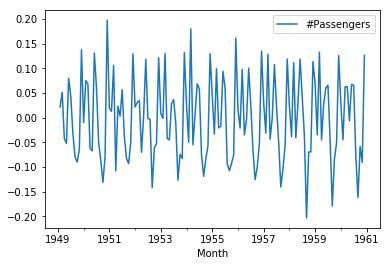

In [89]:
# plot your differenced time series


subt2_diff.plot()

In [90]:
# drop nas
subt2_diff=subt2_diff.dropna()

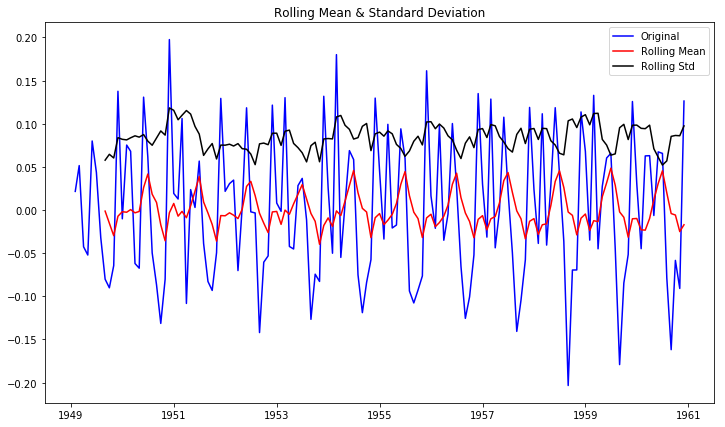

(-4.042239545923528, 0.0012047870704991177, 14, 128, {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}, -519.6186751693821)
stationary


In [91]:
# perform the stationarity check
stationarity_check(subt2_diff, subt2_diff['#Passengers'])


### Your conclusion

# Your conclusion here
after log transform, exp rollling mean difference and differincing, DatA is statianory and ready for modelling. 


## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.